we're going to follow the following steps:

1. Data Extraction
2. Data Analysis
3. Data Interpretation and Representation
4. Data Preprocessing
    * Data Cleaning
    * Feature Selection
    * Feature Scaling
    * Outlier Detection
5. Model Selection
6. Model Evaluation
7. Feature Importance



***************************************************************************************

# TimeSeries data is basically divided in 4 parts:
    1. Trend : It can be upward or downward.
    
    2. Seasonal : Data will vary according to season like:
                : In summer the ac sales are high and in winter ac sales are low.
    
    3. Irregularity(noise) : Unsystematic also called as residuals. 
                           : It happend for small duration like natural disasters. 
                           : At that time sales of medicines will be increase.
                           
    4. Cyclic : Repeating up and down moment don't have any pattern and very hard to predict.
 
* when we cannot use timeseries:
    1. when our values are constant. like sale of last month is 500 and in this month is also 500 means constant.
    2. when values in the form of function like sine or cos function.

In [1]:
#Importing Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#plot style.
plt.style.use('seaborn')

# Data Extraction

In [2]:
#Load the data into dataframe.
df = pd.read_csv('gold_monthly_csv.csv')

#Having a look at the data.
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
#Having a look at thed shape.
df.shape

(847, 2)

* We have 847 rows and 2 columns.

In [4]:
#Having a look at the info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


* As we can see, date shows in object format.

In [5]:
#Let's change date into datetime.
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#Having a look at the info now.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    847 non-null    datetime64[ns]
 1   Price   847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


* As we can see, now date is in datetime format.

In [7]:
#Let's check do we have missing values or not.
df.isna().sum()

Date     0
Price    0
dtype: int64

* We don't have any kind of missing values.

In [8]:
#let's see aggregation.
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [9]:
#let's set date as index.
df.set_index('Date',inplace = True)

#Having a look at the data.
df.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


Text(0, 0.5, 'Amount')

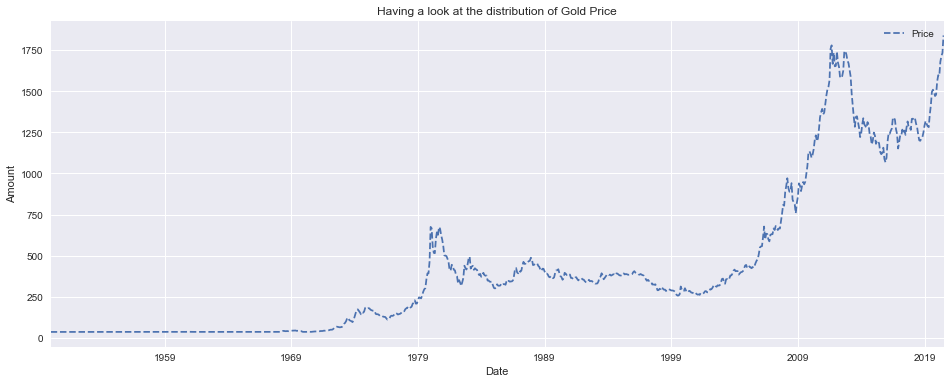

In [10]:
#Having a look at the visualization.
df.plot(kind = 'line',figsize = (16,6),ls = '--')
plt.title('Having a look at the distribution of Gold Price')
plt.xlabel('Date')
plt.ylabel('Amount')


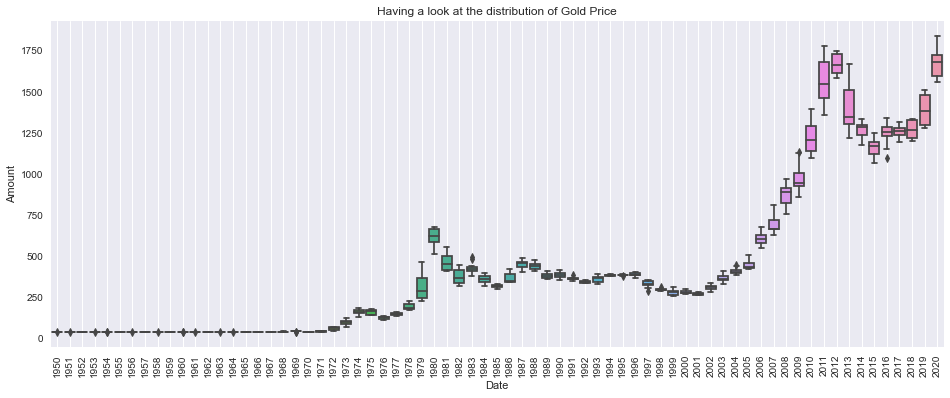

In [11]:
#Having a look at the visualization.
plt.figure(figsize = (16,6))
sns.boxplot(x = df.index.year, y = df['Price'])
plt.title('Having a look at the distribution of Gold Price')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation = 90)
plt.grid();

# Stationary or Not

In [12]:
#TO check data is stationary or not.
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.9655096003175738, True)

* True means our data is not stationary.

# Because we have the daily data so here I am doing defferencing by 30.

1.  AR : P (PACF)
2.  I  : Differencing D
3.  Ma : Q (ACF)

So we have d value of 30

In [ ]:
#First differencial
df['First differencing'] = df['Price'] - df['Price'].shift(30)

df.head()

In [ ]:
#Droping the na values befor doing adfuller test.
adf = adfuller(df['First differencing'].dropna())

#Here we are getting value of p.
p = adf[1]

if p > 0.05:
    print('Data is not stationary')
else:
    print('Data is stationary')

* See now we have stationary data.

# Let's find other values by PACF and ACF.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df.head()

# In auto correlation plot how days are correlated with each other.
Here we are lokking at how days are correlated with each other.

In [ ]:
acf = plot_acf(df['First differencing'].dropna())

* which data is giving highest differencing.
Q is 1

* So here we are getting value of Q. = 20
* will calculating by the point giving next higher value befor going inside boundary. will conside first point as 0 and start calculating after words.

# Lets find PACF

In [ ]:
pacf = plot_pacf(df['First differencing'].dropna())

* first will go with p = 1 then try p = 2
* closest poing befor start bound in the beggining.

# Let's do train and test

In [ ]:
from datetime import datetime,timedelta

In [ ]:
train_dataset_end = datetime(2010,12,1)
test_dataset_end = datetime(2020,12,1)

In [21]:
df.shape

(847, 1)

In [29]:

(847-678)

169

In [61]:
train_data = df[:840]
test_data = df[-8:]

In [62]:
train_data.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [63]:
test_data.head()

,Price
Date,
2019-12-01,1480.025
2020-01-01,1560.668
2020-02-01,1598.818
2020-03-01,1593.764
2020-04-01,1680.030


<AxesSubplot:xlabel='Date'>

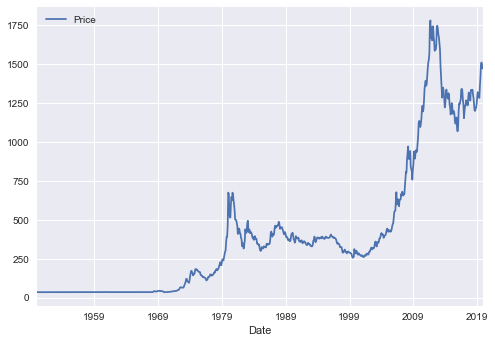

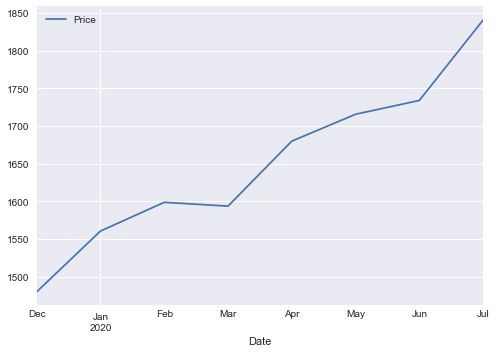

In [64]:
train_data.plot()
test_data.plot()

In [65]:
#Importing model
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
arima_model = auto_arima(train_data,start_p=0,d=1,start_q=0,
                        max_p = 5,max_d = 5, max_q = 5,
                        start_P=0,D=1,start_Q=0,
                        max_P = 5,max_D = 5, max_Q = 5,
                        error_action = 'warn', trace = True,
                        supress_warnings = True, stepwise = True,
                        random_stats = 20,n_fits = 50, seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7743.277, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7706.439, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7699.172, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7745.459, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7694.655, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7690.718, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7699.855, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7691.977, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7694.366, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7690.359, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7697.951, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7692.355, Time=0.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7699.419, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7692.743, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[0]          

P,d,q

* p = 1,2
* d = 30
* q = 1

In [67]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  840
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -3840.180
Date:                Fri, 05 May 2023   AIC                           7690.359
Time:                        19:57:53   BIC                           7714.020
Sample:                             0   HQIC                          7699.428
                                - 840                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0929      1.873      1.651      0.099      -0.578       6.764
ar.L1         -0.7877      0.055    -14.378      0.000      -0.895      -0.680
ma.L1          1.0391      0.058     17.978      0.000       0.926       1.152
ma.L2          0.1374      0.029      4.724      0.000       0.080       0.194
sigma2       553.4182     10.240     54.045      0.000     533.348     573.488
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6794.26
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             418.52   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
pred = pd.DataFrame(arima_model.predict(n_periods=8),index= test_data.index)
pred.columns = ['Pred_sales']
pred

,Pred_sales
Date,
2019-12-01,1491.016484
2020-01-01,1487.852235
2020-02-01,1493.437508
2020-03-01,1492.131181
2020-04-01,1496.253054
2020-05-01,1496.099381
2020-06-01,1499.313360
2020-07-01,1499.874793


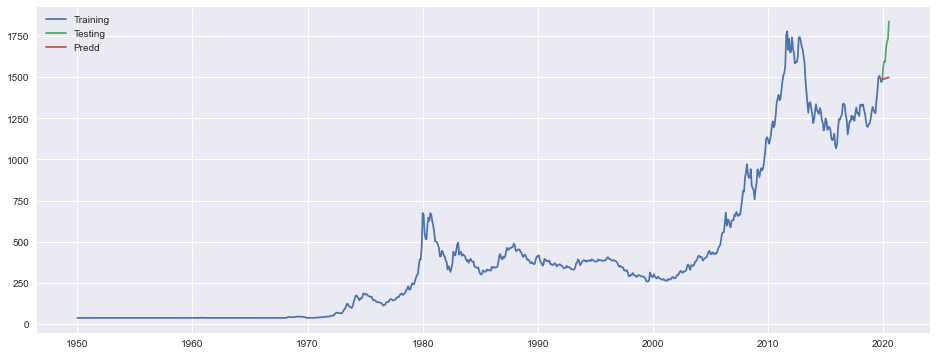

In [69]:
plt.figure(figsize=(16,6))
plt.plot(train_data,label = 'Training')
plt.plot(test_data,label = 'Testing')
plt.plot(pred,label = 'Predd')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import r2_score
test_data['Pred_sales'] = pred
r2_score(test_data['Price'],test_data['Pred_sales'])

-2.0675105953410466